## cl - Cloud fraction in vertical coordinate layer (high clouds)

High Cloud Fraction (HCF) - maximum cloud fraction from 250-100 hpa <br>

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

import skimage.measure as skm
from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
from plotFuncs import *

In [3]:
from myFuncs import *

### one dataset

In [17]:
variable = 'cl'

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:cl, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:     (time: 360, lat: 36, bnds: 2, lon: 144, lev: 48)
Coordinates:
  * lat         (lat) float64 -35.0 -33.0 -31.0 -29.0 ... 29.0 31.0 33.0 35.0
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lev         (lev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
  * time        (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables: (12/14)
    average_DT  (time) timedelta64[ns] ...
    average_T1  (time) datetime64[ns] ...
    average_T2  (time) datetime64[ns] ...
    lat_bnds    (time, lat, bnds) float64 ...
    lon_bnds    (time, lon, bnds) float64 ...
    ps          (time, lat, lon) float32 ...
    ...          ...
    lev_bnds    (time, lev, bnds) float64 ...
    a           (time, lev) float64 ...
    a_bnds      (time, lev, bnds) float64 ...
    b           (time, lev) float64 ...
    b_bnds      (time, lev, bnds) float64 ...
    p0          (time) float32 ...
Attributes: (12/27)
    title:                  NOAA GFDL GFDL-CM3, historical (run 1) experiment...
    institute_id:           NOAA GFDL
    source:                 GFDL-CM3 2010 atmosphere: AM3 (AM3p9,C48L48); sea...
    contact:                gfdl.climate.model.info@noaa.gov
    project_id:             CMIP5
    table_id:               Table Amon (31 Jan 2011)
    ...                     ...
    parent_experiment_id:   piControl
    physics_version:        1
    product:                output1
    institution:            NOAA GFDL(201 Forrestal Rd, Princeton, NJ, 08540)
    history:                File was processed by fremetar (GFDL analog of CM...
    parent_experiment_rip:  r1i1p1

In [6]:
data = ds['cl']
data

<xarray.DataArray 'cl' (time: 360, lev: 48, lat: 36, lon: 144)>
[89579520 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lev      (lev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
Attributes:
    cell_methods:      time: mean
    interp_method:     conserve_order1
    long_name:         Cloud Area Fraction
    original_name:     tot_cloud_area
    units:             %
    standard_name:     cloud_area_fraction_in_atmosphere_layer
    original_units:    percent
    cell_measures:     area: areacella
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [7]:
ds['lev']

<xarray.DataArray 'lev' (lev: 48)>
array([9.961099e-01, 9.873945e-01, 9.767074e-01, 9.637827e-01, 9.482209e-01,
       9.295540e-01, 9.072550e-01, 8.807399e-01, 8.493971e-01, 8.126292e-01,
       7.698747e-01, 7.206968e-01, 6.648809e-01, 6.026212e-01, 5.350591e-01,
       4.649418e-01, 3.963630e-01, 3.331552e-01, 2.773648e-01, 2.292632e-01,
       1.882549e-01, 1.535420e-01, 1.243594e-01, 9.999907e-02, 7.981281e-02,
       6.321172e-02, 4.966566e-02, 3.870170e-02, 2.990173e-02, 2.289962e-02,
       1.737780e-02, 1.306353e-02, 9.724891e-03, 7.166759e-03, 5.226664e-03,
       3.770814e-03, 2.690258e-03, 1.897296e-03, 1.322170e-03, 9.100661e-04,
       6.184560e-04, 4.147679e-04, 2.743885e-04, 1.787529e-04, 1.136180e-04,
       6.865516e-05, 3.801024e-05, 1.710525e-05])
Coordinates:
  * lev      (lev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
Attributes:
    long_name:      hybrid sigma pressure coordinate
    units:          1
    positive:       down
    axis:           Z
    bounds:         lev_bnds
    formula:        p(n,k,j,i) = a(k)*p0 + b(k)*ps(n,j,i)
    formula_terms:  p0: p0 a: a b: b ps: ps
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate

In [8]:
p_hybridSigma = ds.a*ds.p0 + ds.b*ds.ps
p_hybridSigma

<xarray.DataArray (time: 360, lev: 48, lat: 36, lon: 144)>
array([[[[1.01894608e+05, 1.01846304e+05, 1.01776078e+05, ...,
          1.01929760e+05, 1.01935698e+05, 1.01926608e+05],
         [1.01908842e+05, 1.01844686e+05, 1.01756366e+05, ...,
          1.01972110e+05, 1.01971457e+05, 1.01952165e+05],
         [1.01852997e+05, 1.01774849e+05, 1.01672155e+05, ...,
          1.01944741e+05, 1.01933293e+05, 1.01903705e+05],
         ...,
         [9.53060079e+04, 9.76435940e+04, 9.97014663e+04, ...,
          8.87995016e+04, 9.09023548e+04, 9.36012271e+04],
         [9.14276498e+04, 9.54830517e+04, 9.96286721e+04, ...,
          9.20106883e+04, 8.87169719e+04, 9.00606065e+04],
         [9.32008201e+04, 9.36241144e+04, 9.58309605e+04, ...,
          9.96099249e+04, 9.61537795e+04, 9.55944376e+04]],

        [[1.00997530e+05, 1.00949773e+05, 1.00880341e+05, ...,
          1.01032285e+05, 1.01038155e+05, 1.01029169e+05],
         [1.01011603e+05, 1.00948173e+05, 1.00860852e+05, ...,
          1.01074156e+05, 1.01073510e+05, 1.01054436e+05],
         [1.00956390e+05, 1.00879125e+05, 1.00777593e+05, ...,
          1.01047096e+05, 1.01035778e+05, 1.01006525e+05],
...
         [3.93428993e+00, 3.93428993e+00, 3.93428993e+00, ...,
          3.93428993e+00, 3.93428993e+00, 3.93428993e+00],
         [3.93428993e+00, 3.93428993e+00, 3.93428993e+00, ...,
          3.93428993e+00, 3.93428993e+00, 3.93428993e+00],
         [3.93428993e+00, 3.93428993e+00, 3.93428993e+00, ...,
          3.93428993e+00, 3.93428993e+00, 3.93428993e+00]],

        [[1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         ...,
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00]]]])
Coordinates:
  * lev      (lev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8

In [9]:
p_hybridSigma.isel(time=0).sel(lat=1.0,lon=1.25)

<xarray.DataArray (lev: 48)>
array([1.00643028e+05, 9.97601049e+04, 9.86748694e+04, 9.73625298e+04,
       9.57826130e+04, 9.38877065e+04, 9.16244746e+04, 8.89338757e+04,
       8.57541748e+04, 8.20251650e+04, 7.76905610e+04, 7.27068239e+04,
       6.70532907e+04, 6.07507298e+04, 5.39146440e+04, 4.68206485e+04,
       3.98808444e+04, 3.34857659e+04, 2.78492837e+04, 2.30045659e+04,
       1.88885137e+04, 1.54091885e+04, 1.24835684e+04, 1.00408760e+04,
       8.01625684e+03, 6.35080078e+03, 4.99146631e+03, 3.89092334e+03,
       3.00732324e+03, 2.30401050e+03, 1.74918298e+03, 1.31552087e+03,
       9.79789001e+02, 7.22429749e+02, 5.27154541e+02, 3.80544556e+02,
       2.71668335e+02, 1.91722839e+02, 1.33702576e+02, 9.21002350e+01,
       6.26404419e+01, 4.20468979e+01, 2.78422012e+01, 1.81597347e+01,
       1.15712252e+01, 7.03295517e+00, 3.93428993e+00, 1.84861004e+00])
Coordinates:
  * lev      (lev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
    time     object 1970-01-16 12:00:00
    lat      float64 1.0
    lon      float64 1.25

In [10]:
# In paper by Schiro, the low clouds were calculated from maximum cloud fraction between specified pressure levels after cloud fraction has been interpolated onto 
# 19 pressure levels from the native vertical levels

In [11]:
def convert_hybrid_to_pressure():
    pressure_levels = xr.DataArray(
        data=[1000.0, 925.0, 850.0, 700.0, 600.0, 500.0, 400.0, 300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 20.0, 10.0, 7.0, 5.0]
        )

In [12]:
# this way I have calculated the maximum cloud fraction between the levels, but I have not interpolated it ot 19 levels first,
# so when multiple levels are averaged they might give a different cloud fraction maximum for each considered level

pressureLevels_high = xr.where((p_hybridSigma<=2.5e4) & (p_hybridSigma>=1e4), 1, 0)
cl_high = data*pressureLevels_high
cl_high = cl_high.max(dim='lev')
cl_high

<xarray.DataArray (time: 360, lat: 36, lon: 144)>
array([[[9.30456638e+00, 5.64848518e+00, 3.06135225e+00, ...,
         2.31507053e+01, 1.71832657e+01, 1.15437622e+01],
        [5.59240961e+00, 4.17667770e+00, 2.41174889e+00, ...,
         1.72933998e+01, 9.91657162e+00, 6.24759531e+00],
        [1.96120012e+00, 1.35187256e+00, 5.23555934e-01, ...,
         1.02124796e+01, 5.46770954e+00, 2.76237965e+00],
        ...,
        [5.47390804e-02, 6.20224595e-01, 2.31252384e+00, ...,
         8.52515280e-01, 3.34816664e-01, 5.34138978e-02],
        [5.36004715e-02, 1.01907171e-01, 3.68851483e-01, ...,
         1.71348548e+00, 7.55213141e-01, 1.81762457e-01],
        [6.52394772e-01, 1.02075410e+00, 2.63562369e+00, ...,
         3.62356353e+00, 2.11107039e+00, 1.17345369e+00]],

       [[1.82450275e+01, 1.36941633e+01, 9.36188793e+00, ...,
         2.03242226e+01, 1.95441456e+01, 1.91201553e+01],
        [1.33530121e+01, 1.06447449e+01, 6.18240929e+00, ...,
         1.45169230e+01, 1.37597895e+01, 1.34994097e+01],
        [1.00994883e+01, 6.37269354e+00, 3.06887746e+00, ...,
         1.32789927e+01, 1.17752609e+01, 1.11683111e+01],
...
        [8.64809036e+00, 9.38218784e+00, 1.02918806e+01, ...,
         1.48415194e+01, 1.21308298e+01, 9.49251270e+00],
        [8.48954296e+00, 8.06582737e+00, 8.90422058e+00, ...,
         1.90673561e+01, 1.50322781e+01, 1.12839375e+01],
        [1.16027002e+01, 1.09348936e+01, 1.05835047e+01, ...,
         1.96262550e+01, 1.59676390e+01, 1.38393822e+01]],

       [[5.80451059e+00, 4.83994722e+00, 4.24460649e+00, ...,
         8.34424973e+00, 7.20421600e+00, 6.48108149e+00],
        [3.76712513e+00, 2.61999655e+00, 1.28179848e+00, ...,
         6.48485708e+00, 5.53915262e+00, 4.59493542e+00],
        [1.25295651e+00, 4.25055772e-01, 4.31087688e-02, ...,
         5.45615101e+00, 3.99351335e+00, 2.27075386e+00],
        ...,
        [5.61999440e-01, 8.41593295e-02, 1.18443221e-01, ...,
         8.98334885e+00, 4.77387476e+00, 1.76867175e+00],
        [1.21974063e+00, 5.81203580e-01, 5.62367022e-01, ...,
         8.94483471e+00, 5.70135975e+00, 3.27071667e+00],
        [3.56283474e+00, 2.48936629e+00, 2.08875871e+00, ...,
         1.26088705e+01, 9.48457718e+00, 5.91142845e+00]]])
Coordinates:
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00

In [15]:
cl_high = regrid_conserv(cl_high)
cl_high

<xarray.DataArray (time: 360, lat: 22, lon: 128)>
array([[[6.07456853e-01, 4.54547905e-01, 1.92150945e-01, ...,
         1.10161057e+01, 6.10198128e+00, 2.78423578e+00],
        [1.30984954e-03, 5.09385932e-04, 8.89445492e-04, ...,
         6.90385150e+00, 3.76349034e+00, 1.21321163e+00],
        [0.00000000e+00, 9.45106165e-03, 1.21786498e-01, ...,
         4.96056239e+00, 3.27149260e+00, 8.40564006e-01],
        ...,
        [6.93209769e+00, 7.91565396e+00, 9.18178878e+00, ...,
         4.73363347e+00, 6.10611033e+00, 6.76804254e+00],
        [5.55719233e+00, 7.53730706e+00, 1.00987097e+01, ...,
         6.44195298e-01, 1.33920101e+00, 2.56889882e+00],
        [8.10076015e-01, 2.34122559e+00, 5.63206402e+00, ...,
         6.66083484e-01, 3.64101581e-01, 2.13588068e-01]],

       [[6.49375338e+00, 4.37075985e+00, 1.90741466e+00, ...,
         1.75307958e+01, 1.45758834e+01, 1.13571642e+01],
        [9.37561701e-01, 4.04922067e-01, 4.07507278e-02, ...,
         1.81880604e+01, 1.17442422e+01, 5.50498029e+00],
        [5.20673452e-02, 2.02821088e-02, 9.58258028e-04, ...,
         1.22983384e+01, 5.81297695e+00, 1.91187668e+00],
...
        [2.72418069e+01, 2.69885162e+01, 2.54347892e+01, ...,
         2.43351300e+01, 2.45119894e+01, 2.53732411e+01],
        [2.04844574e+01, 2.08919373e+01, 2.06010860e+01, ...,
         1.60477285e+01, 1.65465860e+01, 1.78806249e+01],
        [1.07194981e+01, 1.12616014e+01, 1.18149541e+01, ...,
         1.32402726e+01, 1.26435621e+01, 1.12926116e+01]],

       [[5.15872264e-01, 2.72901344e-01, 4.09067101e-02, ...,
         6.42681278e+00, 4.18911019e+00, 2.09480851e+00],
        [4.12727541e-02, 1.61617698e-02, 1.46327509e-04, ...,
         3.69713033e+00, 2.10255687e+00, 7.69107790e-01],
        [2.24369433e-03, 8.55805212e-03, 1.06705039e-02, ...,
         2.10872253e+00, 6.53158270e-01, 1.27151388e-01],
        ...,
        [1.37177032e+01, 1.34651685e+01, 1.18982941e+01, ...,
         1.07735448e+01, 1.07534953e+01, 1.17453848e+01],
        [4.93481090e+00, 5.96135406e+00, 7.16176809e+00, ...,
         5.14788880e+00, 3.38943847e+00, 3.33854677e+00],
        [9.93359995e-01, 9.59473943e-01, 1.23184039e+00, ...,
         1.07913080e+01, 6.97091330e+00, 3.67804736e+00]]])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

In [20]:
data = cl_high

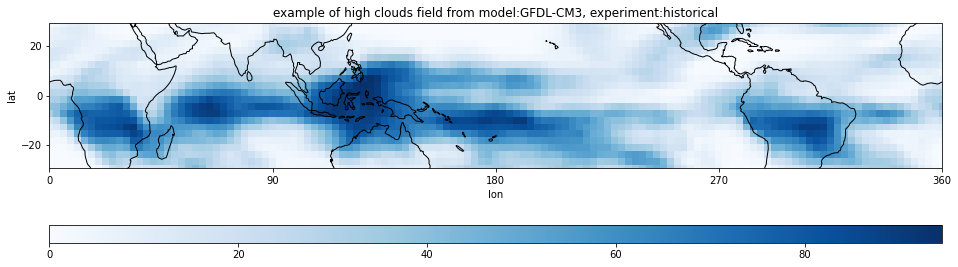

In [19]:
scene = data.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format('high clouds', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

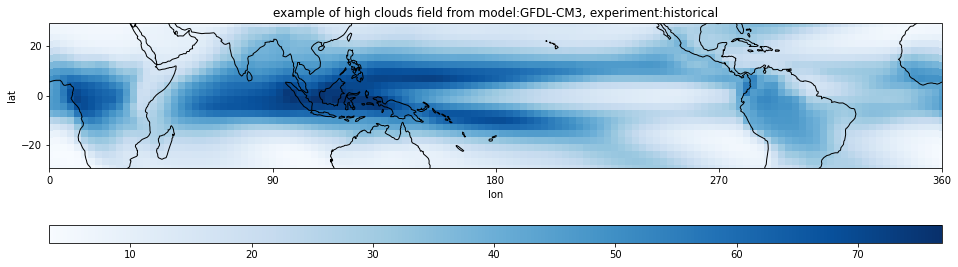

In [25]:
scene = data.mean(dim='time')
title = 'example of {} field from model:{}, experiment:{}'.format('high clouds', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

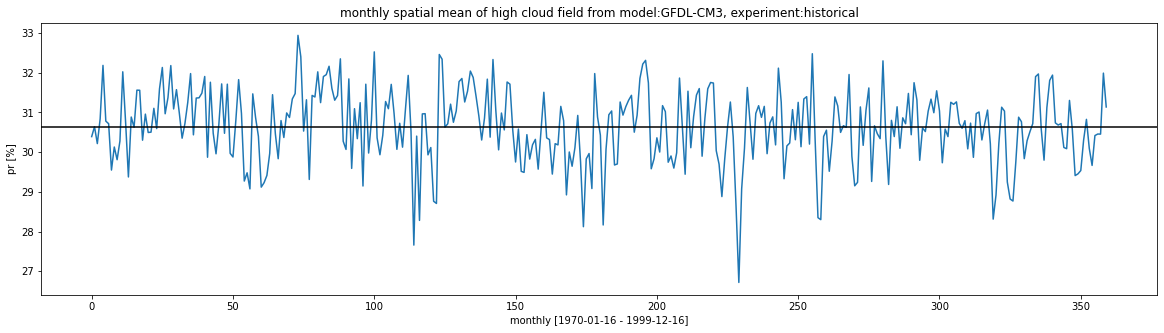

In [24]:
# variable = 'sMean'

timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

aWeights = np.cos(np.deg2rad(data.lat))
y= data.weighted(aWeights).mean(dim=('lat','lon'))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], 'high cloud', datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = 'pr [{}]'.format('%')


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

### comparing datasets

In [ ]:
variable = 'cl'

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

experiments =[
    'historical',
    # 'rcp85'
    ]